In [4]:
import pandas as pd
import numpy as np
import difflib

In [5]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

In [6]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
movies['title'] = movies.apply(lambda x: x['title'][:-7].lower(), axis = 1)
movies.head(10)

,movieId,title,genres
0,1,toy story,Adventure|Animation|Children|Comedy|Fantasy
1,2,jumanji,Adventure|Children|Fantasy
2,3,grumpier old men,Comedy|Romance
3,4,waiting to exhale,Comedy|Drama|Romance
4,5,father of the bride part ii,Comedy
5,6,heat,Action|Crime|Thriller
6,7,sabrina,Comedy|Romance
7,8,tom and huck,Adventure|Children
8,9,sudden death,Action
9,10,goldeneye,Action|Adventure|Thriller


In [9]:
print(f'Total users: {len(ratings.userId.unique())}')
print(f'Total movies rated: {len(ratings.movieId.unique())}')

Total users: 610
Total movies rated: 9724


In [10]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [11]:
g1 = ratings.groupby(['movieId']).count()
g1.loc[g1.userId > 50]

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
6,102,102,102
7,54,54,54
...,...,...,...
106782,54,54,54
109374,52,52,52
109487,73,73,73


In [12]:
g1.userId.mean()

10.369806663924312

In [13]:
x = g1.userId
y = g1.index

Text(0, 0.5, 'Number of reviews')

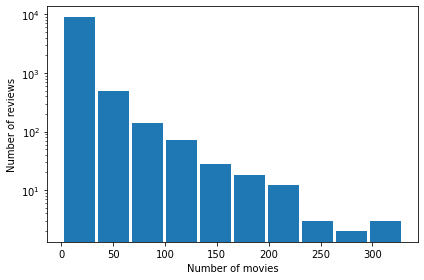

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.hist(x, log = True, rwidth= 0.9)
axs.set_xlabel('Number of movies')
axs.set_ylabel('Number of reviews')

Almost all movies have just 1 rating. To build our model with enough data, we can filter movies rated mnore than 10 times.

In [15]:
data = ratings.merge(movies, how = 'left', on= 'movieId')

In [16]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,toy story,Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,grumpier old men,Comedy|Romance
2,1,6,4.0,964982224,heat,Action|Crime|Thriller
3,1,47,5.0,964983815,seven (a.k.a. se7en),Mystery|Thriller
4,1,50,5.0,964982931,"usual suspects, the",Crime|Mystery|Thriller


In [17]:
average_ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
average_ratings.sort_values(by = 'rating',ascending = False).head(10)

,rating
title,
my life as mcdull (mak dau goo si),5.0
trailer park boys,5.0
ooops! noah is gone...,5.0
open hearts (elsker dig for evigt),5.0
palindromes,5.0
paper birds (pájaros de papel),5.0
particle fever,5.0
battle royale 2: requiem (batoru rowaiaru ii: chinkonka),5.0
"passenger, the (professione: reporter)",5.0


In [18]:
total_ratings = pd.DataFrame(data.groupby('title')['userId'].count())
total_ratings.head()
total_ratings.sort_values(by = 'userId',ascending = False).head(10)

,userId
title,
forrest gump,329
"shawshank redemption, the",317
pulp fiction,307
"silence of the lambs, the",279
"matrix, the",278
star wars: episode iv - a new hope,251
jurassic park,238
braveheart,237
terminator 2: judgment day,224


In [19]:
dff = data.groupby(['title']).agg(
    {
         'rating':'mean',    # Sum duration per group
         'userId': "count",  # get the count of networks
         
    }
)
dff.rename(columns = {'rating':'avg_rating', 'userId': 'tot_ratings'}, inplace = True)
dff.sort_values(by = ['tot_ratings', 'avg_rating'], ascending = False).head(10)

,avg_rating,tot_ratings
title,,
forrest gump,4.164134,329
"shawshank redemption, the",4.429022,317
pulp fiction,4.197068,307
"silence of the lambs, the",4.161290,279
"matrix, the",4.192446,278
star wars: episode iv - a new hope,4.231076,251
jurassic park,3.750000,238
braveheart,4.031646,237
terminator 2: judgment day,3.970982,224


In [20]:
movie_user = data.pivot_table(index='userId',columns='title',values='rating')
movie_user.head(10)

title,,'71,"'burbs, the",'hellboy': the seeds of creation,'night mother,'round midnight,'salem's lot,'til there was you,'tis the season for love,(500) days of summer,...,zone 39,"zone, the (la zona)",zookeeper,zoolander,zoolander 2,zoom,zootopia,zulu,¡three amigos!,à nous la liberté (freedom for us)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
mo = movie_user.columns
in_movie = difflib.get_close_matches('dark knight', mo)[0]

'dark knight, the'

In [31]:
correlations = movie_user.corrwith(movie_user[in_movie])
#correlations = movie_user.corrwith(movie_user['Toy Story (1995)'])
correlations.head(10)

/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
                                         NaN
'71                                      NaN
'burbs, the                         0.240563
'hellboy': the seeds of creation         NaN
'night mother                            NaN
'round midnight                          NaN
'salem's lot                             NaN
'til there was you                       NaN
'tis the season for love                 NaN
(500) days of summer                0.353833
dtype: float64

In [22]:
recommendation = pd.DataFrame(correlations,columns=['Correlation'])
recommendation.dropna(inplace=True)
recommendation = recommendation.join(dff['tot_ratings'])
recommendation.head()

,Correlation,tot_ratings
title,,
"'burbs, the",0.240563,17
(500) days of summer,0.353833,42
*batteries not included,-0.427425,7
10 cent pistol,1.000000,2
10 cloverfield lane,-0.285732,14


In [23]:
recc = recommendation[recommendation['tot_ratings']>10].sort_values('Correlation',ascending=False).reset_index()

In [24]:
recc.head(10)

,title,Correlation,tot_ratings
0,toy story,1.000000,215
1,the nice guys,0.968694,15
2,avengers: infinity war - part i,0.942264,13
3,blues brothers 2000,0.935897,12
4,singles,0.922331,11
5,22 jump street,0.913282,19
6,"passion of the christ, the",0.903757,13
7,untitled spider-man reboot,0.898497,16
8,dunkirk,0.890389,13
9,48 hrs.,0.888116,11


In [25]:
recc = recc.merge(movies,on='title', how='left')
recc.head(10)

,title,Correlation,tot_ratings,movieId,genres
0,toy story,1.000000,215,1,Adventure|Animation|Children|Comedy|Fantasy
1,the nice guys,0.968694,15,158238,Crime|Mystery|Thriller
2,avengers: infinity war - part i,0.942264,13,122912,Action|Adventure|Sci-Fi
3,blues brothers 2000,0.935897,12,1772,Action|Comedy|Musical
4,singles,0.922331,11,3261,Comedy|Drama|Romance
5,22 jump street,0.913282,19,112138,Action|Comedy|Crime
6,"passion of the christ, the",0.903757,13,7318,Drama
7,untitled spider-man reboot,0.898497,16,122926,Action|Adventure|Fantasy
8,dunkirk,0.890389,13,174055,Action|Drama|Thriller|War
9,48 hrs.,0.888116,11,5049,Action|Comedy|Crime|Drama
